<a href="https://colab.research.google.com/github/lorenzrossi/AMD-ComicsFaces/blob/main/AMD_models_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
from os import listdir
import pandas as pd
# Basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

# Image preprocessing
import pathlib
import PIL
import PIL.Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

tfk = tf.keras
tf.keras.backend.set_floatx("float64")


from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/ComicsFaces'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
X = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/X.pickle','rb'))
y = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/y.pickle','rb'))

pics_classes = ['comics','faces']

images_to_plot = 6

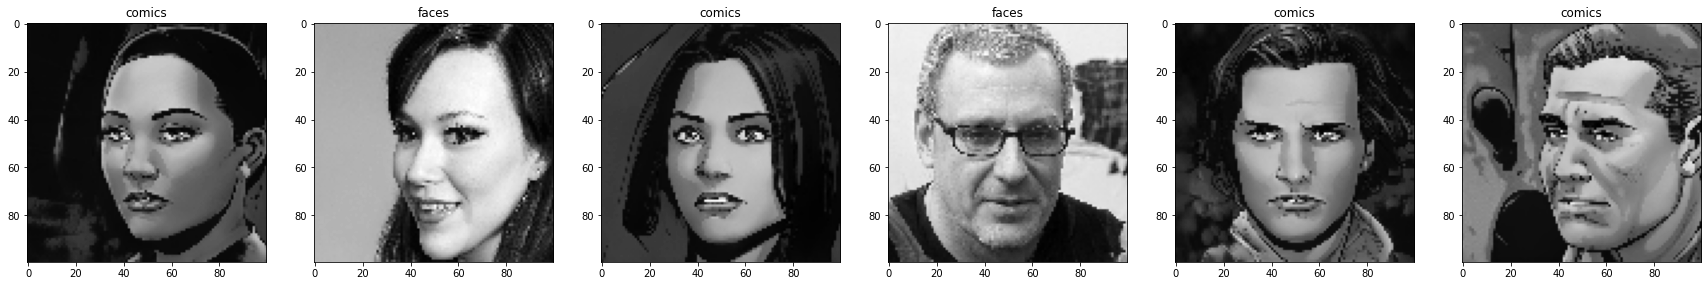

In [32]:
f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(30, 20)

gray_channel = 0

for i in range(images_to_plot):
  gray_image = X[i][:, :, gray_channel]
  ax[i].imshow(gray_image, cmap = "gray")
  numeric_label = y[i]
  ax[i].set_title(pics_classes[numeric_label])

In [19]:
number_of_classes = len(pics_classes)

In [20]:
x_size, img_dim = X.shape[0], X.shape[1]

# rescale in [0,1]
X = tf.cast(X, tf.float32) / 255.0

# one hot encoding
depth = 1
y = tf.reshape(tf.one_hot(y, depth), shape = [x_size, depth])

In [21]:
# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [22]:
# Hyperparameters
epoch = 25 # n of epochs
batch = 64 # batch size

# Defining the loss
loss = keras.losses.BinaryCrossentropy()

# Defining the optimizer(s)
op_1 = Adam()
#op_2 = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/25)

In [23]:
# Defining plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    # Loss plots
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','test'], fontsize = legend_size)

    # Accuracy plots
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    plt.show()

# TRAINING MODEL 1

In [24]:
model1 = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dense(128, use_bias=False, activation='relu'),
        layers.Dense(1, activation = 'sigmoid')
        ])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 80000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               10240000  
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                      

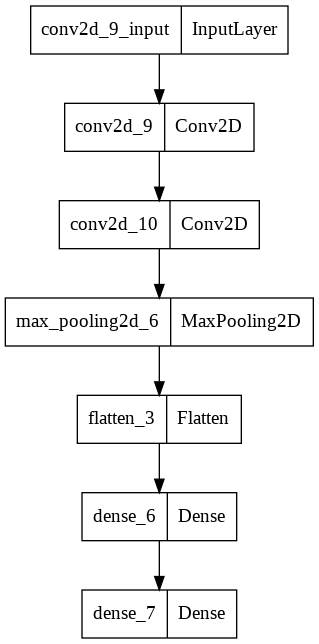

In [25]:
keras.utils.plot_model(model1, 'model.png')

Epoch 1/25
200/200 [==============================] - 5s 21ms/step - loss: 0.1250 - binary_accuracy: 0.9638 - val_loss: 0.0100 - val_binary_accuracy: 0.9975
Epoch 2/25
200/200 [==============================] - 4s 20ms/step - loss: 0.0029 - binary_accuracy: 0.9994 - val_loss: 0.0052 - val_binary_accuracy: 0.9991
Epoch 3/25
200/200 [==============================] - 4s 20ms/step - loss: 0.0010 - binary_accuracy: 0.9998 - val_loss: 0.0040 - val_binary_accuracy: 0.9991
Epoch 4/25
200/200 [==============================] - 4s 20ms/step - loss: 1.4126e-04 - binary_accuracy: 1.0000 - val_loss: 0.0039 - val_binary_accuracy: 0.9988
Epoch 5/25
200/200 [==============================] - 4s 20ms/step - loss: 8.4019e-05 - binary_accuracy: 1.0000 - val_loss: 0.0042 - val_binary_accuracy: 0.9991
Epoch 6/25
200/200 [==============================] - 4s 20ms/step - loss: 5.2154e-05 - binary_accuracy: 1.0000 - val_loss: 0.0041 - val_binary_accuracy: 0.9988
Epoch 7/25
200/200 [==========================

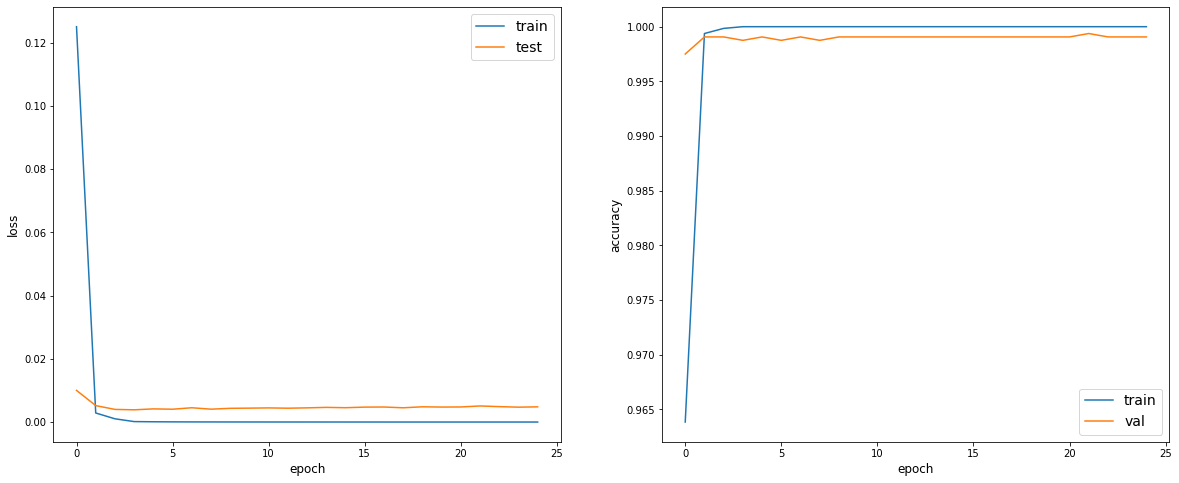

125/125 [==============================] - 1s 6ms/step - loss: 0.0029 - binary_accuracy: 0.9990
test loss, test acc: [0.0029149947634473476, 0.999]


In [26]:
# compiling the model
model1.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model1.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_1 = model1.evaluate(X_test, y_test)
print("test loss, test acc:", result_1)

# TRAINING MODEL 2

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 40000)            

Epoch 1/25
200/200 [==============================] - 5s 25ms/step - loss: 0.1214 - binary_accuracy: 0.9566 - val_loss: 0.0132 - val_binary_accuracy: 0.9959
Epoch 2/25
200/200 [==============================] - 5s 24ms/step - loss: 0.0041 - binary_accuracy: 0.9988 - val_loss: 0.0087 - val_binary_accuracy: 0.9969
Epoch 3/25
200/200 [==============================] - 5s 24ms/step - loss: 0.0016 - binary_accuracy: 0.9995 - val_loss: 0.0066 - val_binary_accuracy: 0.9975
Epoch 4/25
200/200 [==============================] - 5s 24ms/step - loss: 4.4778e-04 - binary_accuracy: 0.9999 - val_loss: 0.0035 - val_binary_accuracy: 0.9981
Epoch 5/25
200/200 [==============================] - 5s 24ms/step - loss: 1.4506e-04 - binary_accuracy: 1.0000 - val_loss: 0.0055 - val_binary_accuracy: 0.9978
Epoch 6/25
200/200 [==============================] - 5s 24ms/step - loss: 6.7219e-05 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 0.9978
Epoch 7/25
200/200 [==========================

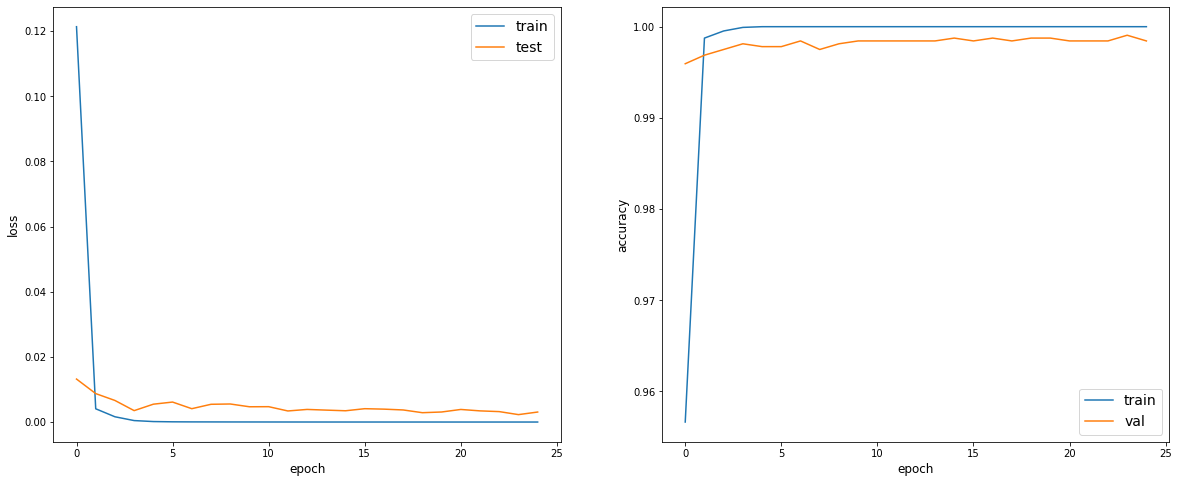

125/125 [==============================] - 1s 7ms/step - loss: 0.0058 - binary_accuracy: 0.9985
test loss, test acc: [0.0057722569900508095, 0.9985]


In [28]:
# compiling the model
model2.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model2.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", result_2)

# TRAINING MODEL 3

In [29]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 128)      

Epoch 1/25
200/200 [==============================] - 6s 27ms/step - loss: 0.1183 - binary_accuracy: 0.9417 - val_loss: 0.0331 - val_binary_accuracy: 0.9891
Epoch 2/25
200/200 [==============================] - 5s 27ms/step - loss: 0.0107 - binary_accuracy: 0.9964 - val_loss: 0.0093 - val_binary_accuracy: 0.9972
Epoch 3/25
200/200 [==============================] - 5s 27ms/step - loss: 0.0043 - binary_accuracy: 0.9984 - val_loss: 0.0047 - val_binary_accuracy: 0.9984
Epoch 4/25
200/200 [==============================] - 5s 27ms/step - loss: 0.0016 - binary_accuracy: 0.9995 - val_loss: 0.0031 - val_binary_accuracy: 0.9994
Epoch 5/25
200/200 [==============================] - 5s 27ms/step - loss: 4.2377e-04 - binary_accuracy: 0.9999 - val_loss: 0.0038 - val_binary_accuracy: 0.9991
Epoch 6/25
200/200 [==============================] - 5s 27ms/step - loss: 9.1963e-05 - binary_accuracy: 1.0000 - val_loss: 0.0038 - val_binary_accuracy: 0.9991
Epoch 7/25
200/200 [==============================

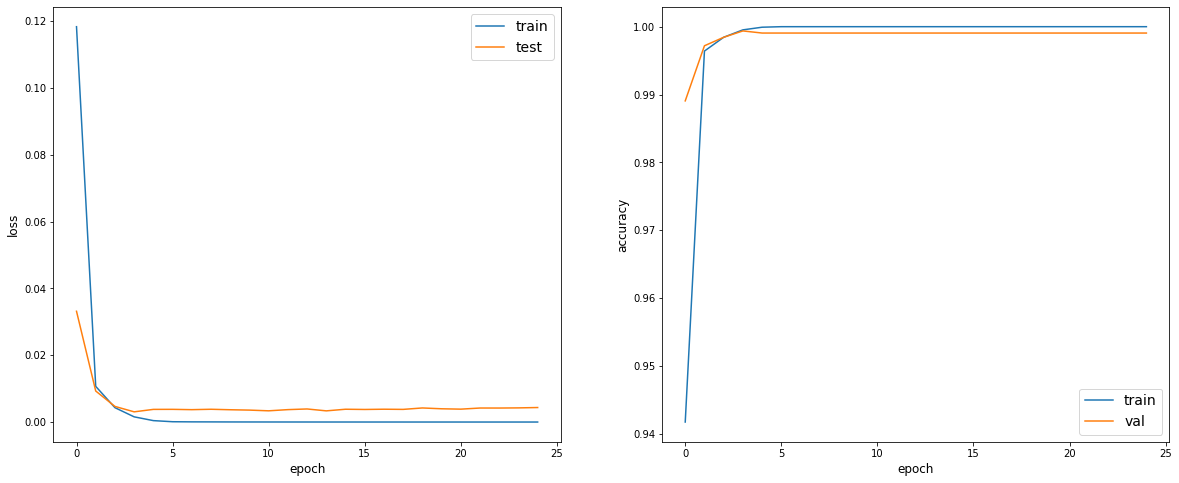

125/125 [==============================] - 1s 7ms/step - loss: 0.0047 - binary_accuracy: 0.9995
test loss, test acc: [0.004748769891574185, 0.9995]


In [30]:
# compiling the model
model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_3 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_3)